# Convolutional Neural Network
## Week 1 Assignment 1 Question 2

In [27]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [2]:
def load_dataset(path_to_train):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])



    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))

    return train_x, train_y, train_dataset

In [24]:
train_path = "images/train_signs.h5"

train_x, train_y, train_dataset = load_dataset(train_path)

In [25]:
train_x = train_x/255

In [11]:
train_x

array([[[[0.89019608, 0.8627451 , 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         [0.89019608, 0.87058824, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.87058824],
         [0.90196078, 0.89803922, 0.86666667]],

        [[0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         [0.89411765, 0.86666667, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.87058824],
         [0.90588235, 0.89803922, 0.86666667]],

        [[0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.83921569],
         [0.89019608, 0.86666667, 0.84313725],
         ...,
         [0.90980392, 0.90196078, 0.87843137],
         [0.90588235, 0.89803922, 0.8745098 ],
         [0.90196078, 0.89803922, 0.86666667]],

        ...,

        [[0.46666667, 0.31764706, 0.2       ],
         [0.48627451, 0.33333333, 0.21568627]

In [29]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [31]:
train_y = convert_to_one_hot(train_y, 6).T

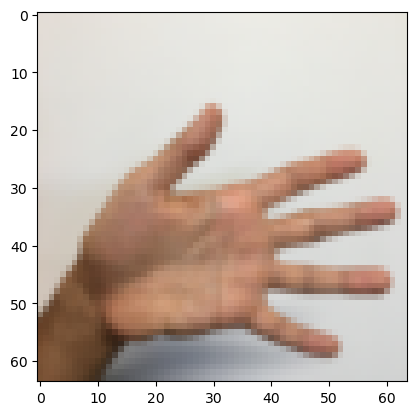

In [13]:
index = 0
plt.imshow(train_x[index])

# ConvNET Aechitecture
Input--> Conv2D--> ReLU-->MaxPool2D-->Conv2D-->ReLU-->MaxPool2D-->Flatten-->Dense <br>
Input --> input_shape = (64, 64, 3) <br>
Conv2D(0) --> 8 filters 4x4 stride = 1, padding = same <br>
ReLU <br>
MaxPool2D(0) --> (8, 8), strides = 8, padding = same <br>
Cnov2D(1) --> 16 filters 2x2, strides = 1, padding = same <br>
ReLU <br>
MaxPool2D(1) --> (4, 4), strides = 4, padding = same <br>
Flatten <br>
Dense

In [56]:
def signModel():
    
    model = tf.keras.Sequential([
        tf.keras.Input(shape = (64, 64, 3)),
        tf.keras.layers.Conv2D(8,(4,4), strides = (1,1), padding = "same"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPool2D((8, 8), strides = (8, 8), padding = "same"),
        tf.keras.layers.Conv2D(16, (2,2), strides = (1,1), padding = "same"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPool2D((4, 4), strides = (4, 4), padding = "same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation = "softmax" )
        
    ])
    
    return model
    

In [57]:
model = signModel()

In [58]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [41]:
def test_dataset(path_to_test):
    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])
    
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return test_x, test_y

In [43]:
test_path = "images/test_signs.h5"
x_test, y_test = test_dataset(test_path)

In [44]:
x_test = x_test/255

In [45]:
y_test = convert_to_one_hot(y_test, 6).T

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [59]:
model.fit(train_dataset, epochs = 200, validation_data=test_dataset)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.1579 - loss: 0.6245 - val_accuracy: 0.1667 - val_loss: 0.5098
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1692 - loss: 0.4852 - val_accuracy: 0.1667 - val_loss: 0.4541
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.1779 - loss: 0.4530 - val_accuracy: 0.1667 - val_loss: 0.4505
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1663 - loss: 0.4504 - val_accuracy: 0.1750 - val_loss: 0.4490
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1922 - loss: 0.4495 - val_accuracy: 0.1500 - val_loss: 0.4485
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.1836 - loss: 0.4490 - val_accuracy: 0.2000 - val_loss: 0.4481
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.2148 - loss: 0.4486 - val_accuracy: 0.2167 - val_loss: 0.4476
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2200 - loss: 0.4482 - val_accuracy: 0.

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6613 - loss: 0.2958 - val_accuracy: 0.5833 - val_loss: 0.3104
Epoch 52/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6701 - loss: 0.2927 - val_accuracy: 0.6083 - val_loss: 0.3072
Epoch 53/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6687 - loss: 0.2899 - val_accuracy: 0.6000 - val_loss: 0.3043
Epoch 54/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6779 - loss: 0.2871 - val_accuracy: 0.6083 - val_loss: 0.3017
Epoch 55/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.6804 - loss: 0.2844 - val_accuracy: 0.6167 - val_loss: 0.2992
Epoch 56/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6791 - loss: 0.2818 - val_accuracy: 0.6000 - val_loss: 0.2969
Epoch 57/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6780 - loss: 0.2793 - val_accuracy: 0.6083 - val_loss: 0.2940
Epoch 58/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6841 - loss: 0.2767 - val_accuracy: 0.6167

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7912 - loss: 0.1993 - val_accuracy: 0.7333 - val_loss: 0.2330
Epoch 102/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7908 - loss: 0.1981 - val_accuracy: 0.7333 - val_loss: 0.2322
Epoch 103/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7929 - loss: 0.1969 - val_accuracy: 0.7333 - val_loss: 0.2316
Epoch 104/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7928 - loss: 0.1958 - val_accuracy: 0.7583 - val_loss: 0.2311
Epoch 105/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7929 - loss: 0.1948 - val_accuracy: 0.7500 - val_loss: 0.2308
Epoch 106/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7933 - loss: 0.1940 - val_accuracy: 0.7583 - val_loss: 0.2300
Epoch 107/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7943 - loss: 0.1929 - val_accuracy: 0.7583 - val_loss: 0.2293
Epoch 108/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7967 - loss: 0.1920 - val_accuracy: 

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8601 - loss: 0.1611 - val_accuracy: 0.7917 - val_loss: 0.2108
Epoch 152/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8620 - loss: 0.1606 - val_accuracy: 0.7917 - val_loss: 0.2105
Epoch 153/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8625 - loss: 0.1600 - val_accuracy: 0.7917 - val_loss: 0.2102
Epoch 154/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8620 - loss: 0.1595 - val_accuracy: 0.7917 - val_loss: 0.2098
Epoch 155/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8634 - loss: 0.1589 - val_accuracy: 0.7917 - val_loss: 0.2096
Epoch 156/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8646 - loss: 0.1583 - val_accuracy: 0.7917 - val_loss: 0.2094
Epoch 157/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8640 - loss: 0.1578 - val_accuracy: 0.7917 - val_loss: 0.2091
Epoch 158/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8652 - loss: 0.1572 - val_accuracy: 

# Model Prediction
1 Load image <br>
2 Change it according to model architecture

In [61]:
import cv2

In [92]:
img = cv2.imread("images/4.jpg")

In [93]:
img.shape

(1200, 800, 3)

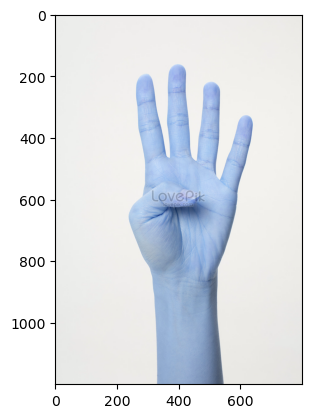

In [94]:
plt.imshow(img)

In [95]:
img_resized = cv2.resize(img, (64,64))

In [96]:
img_resized.shape

(64, 64, 3)

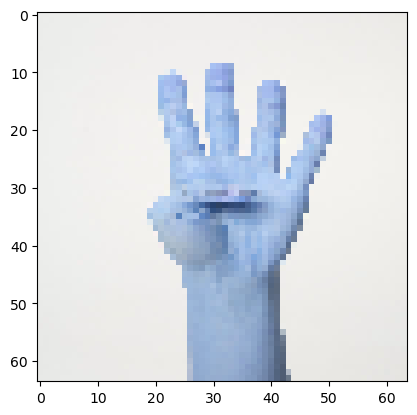

In [97]:
plt.imshow(img_resized)

In [98]:
img_resized = img_resized/255

In [99]:
image = np.expand_dims(img_resized, axis=0)

In [100]:
image.shape

(1, 64, 64, 3)

In [101]:
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[7.2684610e-01, 1.1717828e-01, 1.0559398e-02, 3.4945901e-04,
        8.1092105e-05, 1.4498568e-01]], dtype=float32)